# Object seperation by HSV

what is HSV?

in OpenCV, HSV stands for Hue, Saturation, and Value, which are three components of color representation. The HSV color space is often used in computer vision and image processing because it separates the color information from the brightness and allows for more intuitive color-based image analysis.

Here's a brief explanation of each component in the HSV color space:

Hue (H): Hue represents the type of color. It is measured in degrees from 0 to 360, where 0 and 360 both represent red, and the other colors are distributed around the color wheel. For example, green is typically around 120, and blue is around 240.

Saturation (S): Saturation determines the intensity or purity of the color. It is measured as a percentage, with 0% indicating a shade of gray (unsaturated), and 100% indicating the purest, most vibrant form of the color.

Value (V): Value represents the brightness or lightness of the color. It is also measured as a percentage, with 0% being black and 100% being the full brightness of the color.

In [1]:
#here we can see the BGR color format image and HSV format iamge
import cv2

# Read an image in BGR format
image_bgr = cv2.imread("image.jpg")
# Convert the image to HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Now, 'image_hsv' contains the image in the HSV color space
cv2.imshow("HSVIMAGE",image_hsv)
cv2.imshow("BGRIMAGE",image_bgr)
cv2.waitKey()
cv2.destroyAllWindows()

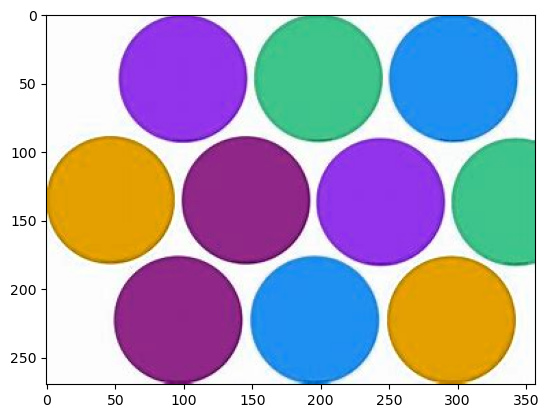

In [2]:
#displaying different color's ball image
import matplotlib.pyplot as plt
img=cv2.imread("color_circle.jfif")
plt.imshow(img)

In [3]:
#extract blue ball from image using HSV
import numpy as np
#read the image from system
image=cv2.imread("color_circle.jfif")
#convert the bgr format image to HSV imag format
hsv_format=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
#extract only blue color from image
lower_blue = np.array([100, 50, 50])#we can find this lower blue value and upper blue value in online  
upper_blue = np.array([140, 255, 255])#it is possible blue color starting and ending hsv position
mask=cv2.inRange(hsv_format,lower_blue,upper_blue)#mask is like a roi(region of interest).using this we can sperate blue color portition from hsv image
res=cv2.bitwise_and(image,image,mask=mask)#first compare image with image then that result will compare with mask
#image: This is the input image that you want to apply the mask to.
#image: This is the same input image used again as the second argument. It represents another input image, which is often the same as the first input when you want to apply the mask to the same image.
#mask: This is the binary mask that defines which parts of the image should be kept (white) and which parts should be removed (black).
cv2.imshow("NORMALIMAGE",image)
cv2.imshow("MASK IMAGE",mask)
cv2.imshow("ExtractedIMAGE",res)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
#extract green image from actual image and find out lower green and upper green hsv values using trackbar
def nothing(x):
    pass
cv2.namedWindow("tracker")
cv2.createTrackbar('lowerhue','tracker',0,255,nothing)
cv2.createTrackbar('lowesaturation','tracker',0,255,nothing)
cv2.createTrackbar('lowervalue','tracker',0,255,nothing)
cv2.createTrackbar('upperrhue','tracker',255,255,nothing)
cv2.createTrackbar('uppersaturation','tracker',255,255,nothing)
cv2.createTrackbar('uppervalue','tracker',255,255,nothing)
while True:#to run infinity time
    image=cv2.imread('color_circle.jfif')
    #convert bgr format image to hsv format image
    hsv_format=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    #set the lower green and upper green by tracker
    lower_hue=cv2.getTrackbarPos('lowerhue','tracker')
    lower_saturation=cv2.getTrackbarPos('lowesaturation','tracker')
    lower_value=cv2.getTrackbarPos('lowervalue','tracker')
    upper_hue=cv2.getTrackbarPos('upperrhue','tracker')
    upper_saturation=cv2.getTrackbarPos('uppersaturation','tracker')
    upper_value=cv2.getTrackbarPos('uppervalue','tracker')
    lower_green=np.array([lower_hue,lower_saturation,lower_value])
    upper_green=np.array([upper_hue,upper_saturation,upper_value])
    #creataing mask or roi(region of interest)
    mask=cv2.inRange(hsv_format,lower_green,upper_green)
    #fetching only green balls fron actual image using between_and
    res=cv2.bitwise_and(image,image,mask=mask)
    cv2.imshow("NoramlImage",image)
    cv2.imshow("maskImage",mask)
    cv2.imshow("Extractedball",res)
    if cv2.waitKey(1)==ord('q'):
        break
cv2.destroyAllWindows()
#[28,103,105]-is exact lower green value
#[74,216,206]-is exact upper green value

In [7]:
#Check while capturing video,if green color comes front of camera it will show otherthan green it won't show
import numpy as np
def nothing(x):
    pass
cap=cv2.VideoCapture("google_issues_video.mp4")#we can give live capture video by giving (0)
while True:#to run infinity time
    _,frame=cap.read()
    #convert bgr format image to hsv format image
    hsv_format=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    #set the lower green and upper green 
    lower_green=np.array([28,103,105])
    upper_green=np.array([74,216,206])
    #creataing mask or roi(region of interest)
    mask=cv2.inRange(hsv_format,lower_green,upper_green)
    #fetching only green balls fron actual image using between_and
    res=cv2.bitwise_and(frame,frame,mask=mask)
    cv2.imshow("NoramlImage",frame)
    cv2.imshow("maskImage",mask)
    cv2.imshow("Extractedball",res)
    if cv2.waitKey(1)==ord('q'):
        break
cv2.destroyAllWindows()
#it will display while running video if any any green color come,it will display that one 